In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import lib
import re 


%load_ext autoreload
%autoreload 2



In [113]:
df = pd.read_csv('data.csv')

In [115]:
df.head()

,Unnamed: 0,acousticness,artist_name,billboard,danceability,duration_ms,energy,genres,instrumentalness,key,...,peak position,popularity,songid,speechiness,tempo,time_signature,track_id,track_name,valence,weeks on chart
0,0,0.212000,Martha Reeves & The Vandellas,1,0.390,177973.0,0.793,"['brill building pop', 'classic girl group', '...",0.005110,3.0,...,11,23.0,Honey ChileMartha Reeves & The Vandellas,0.0545,200.297,4.0,3YGuismm9qnCaEfUkD8uQA,Honey Chile,0.889,12
1,1,0.499000,James Taylor,1,0.611,200579.0,0.350,"['adult standards', 'folk', 'folk rock', 'folk...",0.000008,5.0,...,3,74.0,Fire And RainJames Taylor,0.0356,76.064,4.0,3LcYYV9ozePfgYYmXv0P3r,Fire And Rain,0.360,16
2,2,0.028500,Snoop Doggy Dogg,1,0.549,211493.0,0.853,"['g funk', 'gangster rap', 'hip hop', 'pop rap...",0.000296,7.0,...,8,74.0,Gin And JuiceSnoop Doggy Dogg,0.1880,94.695,4.0,0WKYRFtH6KKbaNWjsxqm70,Gin And Juice,0.346,20
3,3,0.281000,James Brown,1,0.835,189706.0,0.740,"['funk', 'motown', 'soul']",0.000000,10.0,...,15,7.0,Hot Pants (She Got To Use What She Got To Get ...,0.1770,98.221,4.0,6mwp3O2NelTb7WzB8QoFgh,Hot Pants (She Got To Use What She Got To Get ...,0.750,11
4,4,0.000427,Linda Ronstadt,1,0.420,144773.0,0.822,"['adult standards', 'country rock', 'folk', 'f...",0.000038,11.0,...,10,36.0,How Do I Make YouLinda Ronstadt,0.0542,165.936,4.0,2WX2HSBKkcKVvqTukHZS22,How Do I Make You,0.843,16


In [117]:
df.genres.astype('str')

0        ['brill building pop', 'classic girl group', '...
1        ['adult standards', 'folk', 'folk rock', 'folk...
2        ['g funk', 'gangster rap', 'hip hop', 'pop rap...
3                               ['funk', 'motown', 'soul']
4        ['adult standards', 'country rock', 'folk', 'f...
                               ...                        
43459                                    ['pop', 'uk pop']
43460    ['dance pop', 'girl group', 'pop', 'post-teen ...
43461                                                   []
43462    ['compositional ambient', 'focus', 'nordic pos...
43463    ['banda', 'regional mexican', 'regional mexica...
Name: genres, Length: 43464, dtype: object

In [118]:
df.genres[0]

"['brill building pop', 'classic girl group', 'classic soul', 'disco', 'funk', 'motown', 'quiet storm', 'soul', 'southern soul']"

In [119]:
df = df.loc[~df.genres.isna()]
df.genres = df.genres.str.replace(r'[', '')
df.genres = df.genres.str.replace(r']', '')
df.genres = df.genres.str.replace(r'\'', '')
df.genres = df.genres.str.replace(r'\"', '')
df.genres = df.genres.str.replace(r' ', '')
# df.artist_genre = df.artist_genre.str.replace(r',', ' ')

In [120]:
df.genres.isna().value_counts()

False    43464
Name: genres, dtype: int64

In [7]:
origdf = df.copy()

In [122]:
df.iloc[9]['genres']

'crunk,dancepop,dirtysouthrap,gangsterrap,hiphop,hippop,poprap,rap,southernhiphop,urbancontemporary'

In [123]:
df['artist_genre'] = df['genres']

In [125]:
df.drop(columns=['genres'], inplace=True)

In [126]:
df.head()

,Unnamed: 0,acousticness,artist_name,billboard,danceability,duration_ms,energy,instrumentalness,key,liveness,...,popularity,songid,speechiness,tempo,time_signature,track_id,track_name,valence,weeks on chart,artist_genre
0,0,0.212000,Martha Reeves & The Vandellas,1,0.390,177973.0,0.793,0.005110,3.0,0.1750,...,23.0,Honey ChileMartha Reeves & The Vandellas,0.0545,200.297,4.0,3YGuismm9qnCaEfUkD8uQA,Honey Chile,0.889,12,"brillbuildingpop,classicgirlgroup,classicsoul,..."
1,1,0.499000,James Taylor,1,0.611,200579.0,0.350,0.000008,5.0,0.0844,...,74.0,Fire And RainJames Taylor,0.0356,76.064,4.0,3LcYYV9ozePfgYYmXv0P3r,Fire And Rain,0.360,16,"adultstandards,folk,folkrock,folk-pop,mellowgo..."
2,2,0.028500,Snoop Doggy Dogg,1,0.549,211493.0,0.853,0.000296,7.0,0.6180,...,74.0,Gin And JuiceSnoop Doggy Dogg,0.1880,94.695,4.0,0WKYRFtH6KKbaNWjsxqm70,Gin And Juice,0.346,20,"gfunk,gangsterrap,hiphop,poprap,rap,westcoastrap"
3,3,0.281000,James Brown,1,0.835,189706.0,0.740,0.000000,10.0,0.0557,...,7.0,Hot Pants (She Got To Use What She Got To Get ...,0.1770,98.221,4.0,6mwp3O2NelTb7WzB8QoFgh,Hot Pants (She Got To Use What She Got To Get ...,0.750,11,"funk,motown,soul"
4,4,0.000427,Linda Ronstadt,1,0.420,144773.0,0.822,0.000038,11.0,0.1660,...,36.0,How Do I Make YouLinda Ronstadt,0.0542,165.936,4.0,2WX2HSBKkcKVvqTukHZS22,How Do I Make You,0.843,16,"adultstandards,countryrock,folk,folkrock,heart..."


In [127]:
tdf, uni = lib.classify_genres_ALL(df, 'artist_genre', drop_genre_col=True)

In [128]:
tdf.head()

,Unnamed: 0,acousticness,artist_name,billboard,danceability,duration_ms,energy,instrumentalness,key,liveness,...,indieextremena,bristolindie,ukdrill,scottishrock,vintagejazz,chineseaudiophile,chinesejazz,classicgreekpop,entehno,greekpop
0,0,0.212000,Martha Reeves & The Vandellas,1,0.390,177973.0,0.793,0.005110,3.0,0.1750,...,0,0,0,0,0,0,0,0,0,0
1,1,0.499000,James Taylor,1,0.611,200579.0,0.350,0.000008,5.0,0.0844,...,0,0,0,0,0,0,0,0,0,0
2,2,0.028500,Snoop Doggy Dogg,1,0.549,211493.0,0.853,0.000296,7.0,0.6180,...,0,0,0,0,0,0,0,0,0,0
3,3,0.281000,James Brown,1,0.835,189706.0,0.740,0.000000,10.0,0.0557,...,0,0,0,0,0,0,0,0,0,0
4,4,0.000427,Linda Ronstadt,1,0.420,144773.0,0.822,0.000038,11.0,0.1660,...,0,0,0,0,0,0,0,0,0,0


In [129]:
len(uni)

1488

In [130]:
unigen = uni

In [131]:
len(unigen)

1488

In [132]:
rock=['rock','punk','jamband','grunge']
hip_hop=["hiphop",'crunk','newjack']
rap=['rap','gfunk','drill','grime']
blues=['blues']
jazz=['jazz','ragtime','bossanova','bebop','swing','dixieland','contrabass']
r_n_b=['r&b','soul',"motown",'gospel','funk']
metal=['metal','hardcore','core','thrash']
country=['country','nashville','bluegrass','western','stompandholler','honkytonk']
pop=['pop','boyband','girlgroup','surf']
indie=['indie','neomellow','shoegaze',"singer-songwriter"]
classical=['classical','orchestral','stringquartet','ballet','ensemble','ballroom','choir','romanticera','military','band','baroque','viola','cello',
'orchestra','renaissance','opera']
oldies=['oldies','adultstandard']
latin=['latin','chunchaca','grupera','banda','dominican','champeta','cumbia','mexic','cuba','salsa','venezolano','brazil','marimba','rumba','tango']
arabic=['arabic','arab','ghazal','nasheed','dabke']
indian=['indian','bollywood','sitar']
eastern_european=['easterneuropean',]
carribean=['carribean','mambo','calypso']
african=['african','afrobeat','afro']
edm=['edm','downtempo','house','techno','electro','garage','jungle','trance','tronica','drumandbass','dnb','deepliquidbass','drillandbass',
'bassline','bigroom','skyroom','deepflow','bass']
japanese=['japanese','j-']
korean=['korean','k-']
idm=['idm','ambient','chill','trip']
folk=['folk','americana']
soundtrack=['soundtrack','movie','anime','videogame','broadway','westend','disney','theme']
children=['children','kinder','enfants','nursery','infantil','lullaby']
religious=['religious','chant','praise','ccm','worship','christian','spiritual','islam','anglican','cristiano','gaze']
celtic=['celtic','irish']
white_noise=['whitenoise','atmosphere']
alternative=['alternative','downshift','emo']
disco=['disco']
reggae=['reggae','dub','ska','soca','ragga','dancehall']
meditation=['meditation','chakra']
comedy=['comedy']
avant_garde=['lo-fi']
world=['world']

broad_genres = [rock,hip_hop,rap,blues,jazz,r_n_b,metal,country,pop,indie,classical,oldies,latin,arabic,indian,eastern_european,carribean, african,edm,japanese,korean,idm,folk,soundtrack,children,religious,celtic,white_noise,alternative,disco,reggae,meditation,comedy,avant_garde,world]

In [133]:
new_broad_genre_list = []

for genre_list in broad_genres[0:10]:
    new_genre_list=[]
    for genre_stem in genre_list:
        for genre in unigen:
            if genre_stem in genre:
                new_genre_list.append(genre)
                
    new_broad_genre_list.append(new_genre_list)
    


In [134]:
tdf_final = lib.classify_genres_NARROW(tdf, broad_genres, unigen=unigen)

In [135]:
tdf_final

,Unnamed: 0,acousticness,artist_name,billboard,danceability,duration_ms,energy,instrumentalness,key,liveness,...,ukdrill,scottishrock,vintagejazz,chineseaudiophile,chinesejazz,classicgreekpop,entehno,greekpop,[],['atmosphere']
0,0,0.212000,Martha Reeves & The Vandellas,1,0.390,177973.0,0.793,0.005110,3.0,0.1750,...,0,0,0,0,0,0,0,0,0,0
1,1,0.499000,James Taylor,1,0.611,200579.0,0.350,0.000008,5.0,0.0844,...,0,0,0,0,0,0,0,0,0,0
2,2,0.028500,Snoop Doggy Dogg,1,0.549,211493.0,0.853,0.000296,7.0,0.6180,...,0,0,0,0,0,0,0,0,0,0
3,3,0.281000,James Brown,1,0.835,189706.0,0.740,0.000000,10.0,0.0557,...,0,0,0,0,0,0,0,0,0,0
4,4,0.000427,Linda Ronstadt,1,0.420,144773.0,0.822,0.000038,11.0,0.1660,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43459,43459,0.079900,Ed Sheeran,0,0.675,163049.0,0.919,0.000000,8.0,0.1430,...,0,0,0,0,0,0,0,0,0,0
43460,43460,0.362000,Fifth Harmony,0,0.592,217107.0,0.681,0.000000,0.0,0.1420,...,0,0,0,0,0,0,0,0,0,0
43461,43461,0.204000,Mary Lambert,0,0.568,231520.0,0.514,0.000012,1.0,0.1040,...,0,0,0,0,0,0,0,0,0,0
43462,43462,0.298000,U137,0,0.407,307263.0,0.411,0.935000,11.0,0.0956,...,0,0,0,0,0,0,0,0,0,0


In [139]:
for i, c in enumerate(tdf_final2.columns):
    print (i,c)

0 Unnamed: 0
1 acousticness
2 artist_name
3 billboard
4 danceability
5 duration_ms
6 energy
7 instrumentalness
8 key
9 liveness
10 loudness
11 mode
12 peak position
13 popularity
14 songid
15 speechiness
16 tempo
17 time_signature
18 track_id
19 track_name
20 valence
21 weeks on chart
22 brillbuildingpop
23 classicgirlgroup
24 classicsoul
25 disco
26 funk
27 motown
28 quietstorm
29 soul
30 adultstandards
31 folk
32 mellowgold
33 rootsrock
34 singer-songwriter
35 gfunk
36 gangsterrap
37 hiphop
38 rap
39 countryrock
40 heartlandrock
41 lilith
42 bubblegumpop
43 classicrock
44 merseybeat
45 softrock
46 classiccanadianrock
47 dancepop
48 hippop
49 neosoul
50 newjackswing
51 r&b
52 crunk
53 dirtysouthrap
54 albumrock
55 britishinvasion
56 classicukpop
57 psychedelicrock
58 rock-and-roll
59 artrock
60 canadianpop
61 pop
62 rockabilly
63 northernsoul
64 boyband
65 comic
66 nashvillesound
67 oklahomacountry
68 chicagosoul
69 memphissoul
70 bluesrock
71 hardrock
72 easylistening
73 lounge
74 au

963 afrodancehall
964 daytonindie
965 midwestamericana
966 djent
967 melodicdeathcore
968 spanishhiphop
969 bostonindie
970 adoracion
971 britishpost-rock
972 instrumentalpost-rock
973 christianuplift
974 deepccm
975 canadianmodernjazz
976 darkjazz
977 samba
978 salsaperuana
979 germanindie
980 germanindiefolk
981 reggaetonchileno
982 classicmandopop
983 earlyromanticera
984 abstracthiphop
985 gruperasinmortales
986 diyemo
987 minimaltechhouse
988 drift
989 drone
990 newjerseypunk
991 sacramentoindie
992 indonesianpop
993 mashup
994 frenchsoundtrack
995 britishindierock
996 dominicanpop
997 glitchhop
998 northcarolinaindie
999 rapchileno
1000 j-idol
1001 baroque
1002 earlymusic
1003 peruvianrock
1004 popperuano
1005 southcarolinaindie
1006 traprun
1007 bergenindie
1008 icelandicfolk
1009 argentinehiphop
1010 trapargentino
1011 norteno-sax
1012 instrumentalmathrock
1013 latinworship
1014 russiandancepop
1015 bouncyhouse
1016 brazilianpunk
1017 rockgaucho
1018 bcundergroundhiphop
1019 cu

In [138]:
tdf_final2 = tdf_final.copy()

In [140]:
tdf_final2.drop(columns=tdf_final2.columns[1477:], inplace=True)

genres_final = []
for g in broad_genres:
    genres_final.append(g[0])

    
for col in tdf_final2.columns[22:]:
    drop_col=[]
    if col not in genres_final:
        drop_col.append(col)
    print(drop_col)
        
    tdf_final2.drop(columns=drop_col, inplace=True)

['brillbuildingpop']
['classicgirlgroup']
['classicsoul']
[]
['funk']
['motown']
['quietstorm']
['soul']
['adultstandards']
[]
['mellowgold']
['rootsrock']
['singer-songwriter']
['gfunk']
['gangsterrap']
[]
[]
['countryrock']
['heartlandrock']
['lilith']
['bubblegumpop']
['classicrock']
['merseybeat']
['softrock']
['classiccanadianrock']
['dancepop']
['hippop']
['neosoul']
['newjackswing']
[]
['crunk']
['dirtysouthrap']
['albumrock']
['britishinvasion']
['classicukpop']
['psychedelicrock']
['rock-and-roll']
['artrock']
['canadianpop']
[]
['rockabilly']
['northernsoul']
['boyband']
['comic']
['nashvillesound']
['oklahomacountry']
['chicagosoul']
['memphissoul']
['bluesrock']
['hardrock']
['easylistening']
['lounge']
['australiandance']
['newwavepop']
['classiccountrypop']
['countrydawn']
['freestyle']
['minneapolissound']
['celticrock']
['rhythmandblues']
['glammetal']
['miamihiphop']
['dancerock']
['newromantic']
['newwave']
['permanentwave']
['doo-wop']
[]
['post-teenpop']
['scandipop

['classicj-rock']
['japanesecitypop']
['shibuya-kei']
['hyperpop']
['strut']
['deltablues']
['gospelsingers']
['vintagegospel']
['frenchjazz']
['canadianlatin']
['germansoundtrack']
['gospelr&b']
['oldschooldancehall']
['banjo']
['norwegianpop']
['ottawarap']
['reggaetonflow']
['gabba']
['happyhardcore']
['easycore']
['breakbeat']
['showtunes']
['cartoon']
['progressivemetal']
['corrido']
['deepregionalmexican']
['regionalmexican']
['texascountry']
['palmdesertscene']
['stonermetal']
['classicdanishpop']
['dansktop']
['chillhop']
['indieanthem-folk']
['swedishhardrock']
['deepnewwave']
['dixieland']
['neworleansjazz']
['musicapotosina']
['filterhouse']
['portlandindie']
['catstep']
['electra']
['basstrip']
['latinchristian']
['bostonhiphop']
['basstrap']
['modernsalsa']
['birminghamhiphop']
['grime']
['ska']
['acidhouse']
['bedroompop']
['bedroomsoul']
['alabamametal']
['hardalternative']
['folkmetal']
['medievalrock']
['calminginstrumental']
['acousticblues']
['rootsamericana']
['chri

['cubanalternative']
['rapmarseille']
['emopunk']
['orgcore']
['microhouse']
['rockalternativoespanol']
['cantopop']
['australianmetalcore']
['animerock']
['j-pixie']
['jovemguarda']
['circuit']
['retrosoul']
['futurehouse']
['sertanejotradicional']
['cinematicpost-rock']
['australianalternativepop']
['britishcontemporaryclassical']
['minimal']
['rockcristiano']
['argentineindie']
['classify']
['folktronica']
['gothicamericana']
['lafayetteindie']
['idahoindie']
['anadolurock']
['karadenizhalkmuzigi']
['turkishalternative']
['turkishalternativerock']
['dominicanindie']
['classicalcello']
['chileanindie']
['channelpop']
['argentinetelepop']
['phonk']
['singaporeanmandopop']
['chineseelectropop']
['chineseidolpop']
['melbournebounce']
['frenchbaroque']
['deepdiscohouse']
['germanhouse']
['osharekei']
['concepcionindie']
['nashvillesinger-songwriter']
['newtribe']
['shamanic']
['screamrap']
['australianr&b']
['australianindiefolk']
['euphorichardstyle']
['hardstyle']
['germanjazz']
['chor

[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
['chillwave']
['indier&b']
['boombap']
['anthemworship']
['worldworship']
['dutchhouse']
['dutchpop']
['gospel']
['alternativeemo']
['anthememo']
['dreamo']
['melodichardcore']
['phillyindie']
['contemporarygospel']
['canadiancontemporarycountry']
['nchiphop']
['christianhiphop']
['chicagohouse']
['detroithouse']
['alternativepop']
[]
['punk']
['experimental']
['broadway']
['ambientfolk']
['chamberpsych']
['experimentalpop']
['freakfolk']
['battlerap']
['deepnorteno']
['norteno']
['floridarap']
['instrumentalfunk']
['redneck']
['undergroundhiphop']
['bolero']
['italiandisco']
['cowpunk']
['bahamianpop']
['spaceagepop']
['jazztrumpet']
['raplatina']
['indiepunk']
['midwestemo']
['boogaloo']
['cubanrumba']
['latinjazz']
['mambo']
['salsa']
['salsainternational']
['bakersfieldsound']
['banda']
['grupera']
['rootsreggae']
['cosmicamerican']
['canadianindigenous']
['jumpblues']
['chicanopunk']
['c-pop']
['metallichardcore']
['danishpop']
['austropop']


In [141]:
tdf_final2.head()

,Unnamed: 0,acousticness,artist_name,billboard,danceability,duration_ms,energy,instrumentalness,key,liveness,...,edm,latin,reggae,blues,lo-fi,jazz,comedy,classical,meditation,soundtrack
0,0,0.212000,Martha Reeves & The Vandellas,1,0.390,177973.0,0.793,0.005110,3.0,0.1750,...,0,0,0,0,0,0,0,0,0,0
1,1,0.499000,James Taylor,1,0.611,200579.0,0.350,0.000008,5.0,0.0844,...,0,0,0,0,0,0,0,0,0,0
2,2,0.028500,Snoop Doggy Dogg,1,0.549,211493.0,0.853,0.000296,7.0,0.6180,...,0,0,0,0,0,0,0,0,0,0
3,3,0.281000,James Brown,1,0.835,189706.0,0.740,0.000000,10.0,0.0557,...,0,0,0,0,0,0,0,0,0,0
4,4,0.000427,Linda Ronstadt,1,0.420,144773.0,0.822,0.000038,11.0,0.1660,...,0,0,0,0,0,0,0,0,0,0


In [142]:
tdf_final2.comedy.value_counts()

0    43455
1        9
Name: comedy, dtype: int64

In [143]:
tdf_final2.to_csv('test_data.csv')

In [56]:
tdf_final.drop(columns=tdf_final.columns[16, 18, 20])

0.107000    45
0.117000    43
0.105000    41
0.114000    41
0.113000    41
            ..
0.990000     1
0.001680     1
0.000209     1
0.000046     1
0.007120     1
Name: acousticness, Length: 2995, dtype: int64
0.000000    8839
0.000001      24
0.000010      21
0.000001      18
0.000001      17
            ... 
0.000973       1
0.000088       1
0.542000       1
0.072600       1
0.005120       1
Name: instrumentalness, Length: 4274, dtype: int64
0.1110    177
0.1060    177
0.1070    170
0.1080    169
0.1100    166
         ... 
0.8620      1
0.0189      1
0.8450      1
0.8060      1
0.8030      1
Name: liveness, Length: 1592, dtype: int64
0.9610    120
0.9630    110
0.9620    103
0.9640     88
0.9650     87
         ... 
0.0611      1
0.0642      1
0.0784      1
0.0964      1
0.0400      1
Name: valence, Length: 1076, dtype: int64
119.987    7
119.991    6
116.000    6
119.986    6
125.008    6
          ..
93.103     1
76.022     1
98.994     1
126.553    1
80.000     1
Name: tempo, L

In [ ]:
tdf

In [439]:
test, unique_col_list = lib.classify_genres_ALL(df, 'artist_genre', drop_genre_col=True)

In [456]:
unique_col_list

['brillbuildingpop',
 'classicgirlgroup',
 'classicsoul',
 'disco',
 'funk',
 'motown',
 'quietstorm',
 'soul',
 'adultstandards',
 'folk',
 'folkrock',
 'folk-pop',
 'mellowgold',
 'rock',
 'rootsrock',
 'singer-songwriter',
 'gfunk',
 'gangsterrap',
 'hiphop',
 'poprap',
 'rap',
 'countryrock',
 'heartlandrock',
 'lilith',
 'bubblegumpop',
 'classicrock',
 'merseybeat',
 'softrock',
 'classiccanadianrock',
 'dancepop',
 'hippop',
 'neosoul',
 'newjackswing',
 'r&b',
 'crunk',
 'dirtysouthrap',
 'southernhiphop',
 'albumrock',
 'britishinvasion',
 'classicukpop',
 'psychedelicrock',
 'rock-and-roll',
 'artrock',
 'canadianpop',
 'pop',
 'rockabilly',
 'northernsoul',
 'boyband',
 'comic',
 'country',
 'nashvillesound',
 'oklahomacountry',
 'chicagosoul',
 'memphissoul',
 'bluesrock',
 'britishblues',
 'hardrock',
 'easylistening',
 'lounge',
 'australiandance',
 'newwavepop',
 'classiccountrypop',
 'countrydawn',
 'freestyle',
 'minneapolissound',
 'post-disco',
 'celticrock',
 'rhyth

In [440]:
test.loc[test['phillysoul']==1]

,SongID,spotify_track_id,spotify_track_duration_ms,spotify_track_popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,brillbuildingpop,classicgirlgroup,classicsoul,disco,funk,motown,quietstorm,soul,adultstandards,...,alt-idol,idolrock,opm,pinoyindie,metalcore,ukmetalcore,deathcore,perreo,brassband,secondline,deeptropicalhouse,garagepsych,noiserock,ohioindie,icelandicindie,icelandicrock,australianhouse,braziliandeathmetal,brazilianmetal,brazilianthrashmetal,crossoverthrash,newwaveofthrashmetal,annarborindie,belgianrock,elpasoindie
90,"Got To Get You Into My LifeEarth, Wind & Fire",397c8gwyXM4B2Awi29rpPH,242986.0,53.0,0.692,0.622,6.0,-9.524,1.0,0.0758,0.5810,0.002010,0.1470,0.7670,140.357,4.0,0,0,1,1,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
334,OOOUUUYoung M.A,0D21XvHcVsIvJM6FcGY2BT,234525.0,65.0,0.640,0.819,7.0,-4.108,1.0,0.4550,0.5330,0.000000,0.1560,0.6230,166.012,4.0,0,0,1,1,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
582,Sittin' In The Lap Of LuxuryLouie Louie,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,1,0,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
601,BarracudaHeart,4KfSdst7rW39C0sfhArdrz,261933.0,75.0,0.547,0.691,4.0,-13.553,0.0,0.0369,0.0150,0.105000,0.1440,0.6670,137.148,4.0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
617,Rhiannon (will You Ever Win)Fleetwood Mac,4fbwTO3DJ2qryMddov9RbB,226773.0,51.0,0.684,0.638,9.0,-9.025,0.0,0.0312,0.3650,0.020700,0.1190,0.8100,129.959,4.0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23554,L-O-V-ENat King Cole,0JlHhicC1HetuYgujLD9hO,191200.0,63.0,0.243,0.171,1.0,-17.543,1.0,0.0370,0.8140,0.005230,0.1020,0.0897,126.599,4.0,0,0,0,1,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
23624,"HeatstrokeCalvin Harris Featuring Young Thug, ...",60APt5N2NRaKWf5xzJdzyC,229160.0,59.0,0.784,0.728,0.0,-4.549,0.0,0.0539,0.3400,0.000000,0.2220,0.7130,110.165,4.0,0,0,1,1,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
23971,RideMartina McBride,6zJ8Kn97fZhj10pdHs4X8r,233640.0,19.0,0.529,0.839,7.0,-5.103,1.0,0.0424,0.0314,0.000003,0.3550,0.6240,117.014,4.0,1,0,1,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
24007,SmoothFlorida Georgia Line,31x4wWBghN7f5PiEZUmcAW,170200.0,59.0,0.471,0.848,6.0,-5.355,1.0,0.0538,0.2140,0.000018,0.6580,0.3320,161.049,4.0,1,0,1,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [375]:
rock=['rock','punk','jamband','grunge']
hip_hop=["hiphop",'crunk','newjack']
rap=['rap','gfunk','drill','grime']
blues=['blues']
jazz=['jazz','ragtime','bossanova','bebop','swing','dixieland','contrabass']
r_n_b=['r&b','soul',"motown",'gospel','funk']
metal=['metal','hardcore','core','thrash']
country=['country','nashville','bluegrass','western','stompandholler','honkytonk']
pop=['pop','boyband','girlgroup','surf']
indie=['indie','neomellow','shoegaze',"singer-songwriter"]
classical=['classical','orchestral','stringquartet','ballet','ensemble','ballroom','choir','romanticera','military','band','baroque','viola','cello',
'orchestra','renaissance','opera']
oldies=['oldies','adultstandard']
latin=['latin','chunchaca','grupera','banda','dominican','champeta','cumbia','mexic','cuba','salsa','venezolano','brazil','marimba','rumba','tango']
arabic=['arabic','arab','ghazal','nasheed','dabke']
indian=['indian','bollywood','sitar']
eastern_european=['easterneuropean',]
carribean=['carribean','mambo','calypso']
african=['african','afrobeat','afro']
edm=['edm','downtempo','house','techno','electro','garage','jungle','trance','tronica','drumandbass','dnb','deepliquidbass','drillandbass',
'bassline','bigroom','skyroom','deepflow','bass']
japanese=['japanese','j-']
korean=['korean','k-']
idm=['idm','ambient','chill','trip']
folk=['folk','americana']
soundtrack=['soundtrack','movie','anime','videogame','broadway','westend','disney','theme']
children=['children','kinder','enfants','nursery','infantil','lullaby']
religious=['religious','chant','praise','ccm','worship','christian','spiritual','islam','anglican','cristiano','gaze']
celtic=['celtic','irish']
white_noise=['whitenoise','atmosphere']
alternative=['alternative','downshift','emo']
disco=['disco']
reggae=['reggae','dub','ska','soca','ragga','dancehall']
meditation=['meditation','chakra']
comedy=['comedy']
avant_garde=['lo-fi']
world=['world']



In [376]:
broad_genres = [rock, hip_hop, rap, blues, jazz, r_n_b, 
                metal, country, pop, indie, classical, 
                oldies, latin, arabic, indian, eastern_european, 
               carribean, african, edm, japanese, korean, idm, folk,
               soundtrack, children, religious, celtic, white_noise, alternative, 
               disco, reggae, meditation, comedy, avant_garde, world]

In [378]:
test.head()

,SongID,spotify_track_id,spotify_track_duration_ms,spotify_track_popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,brillbuildingpop,classicgirlgroup,classicsoul,disco,funk,motown,quietstorm,soul,adultstandards,...,alt-idol,idolrock,opm,pinoyindie,metalcore,ukmetalcore,deathcore,perreo,brassband,secondline,deeptropicalhouse,garagepsych,noiserock,ohioindie,icelandicindie,icelandicrock,australianhouse,braziliandeathmetal,brazilianmetal,brazilianthrashmetal,crossoverthrash,newwaveofthrashmetal,annarborindie,belgianrock,elpasoindie
0,Honey ChileMartha Reeves & The Vandellas,3YGuismm9qnCaEfUkD8uQA,177973.0,23.0,0.390,0.793,3.0,-8.887,1.0,0.0545,0.2120,0.005110,0.1750,0.889,200.297,4.0,1,1,1,1,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Fire And RainJames Taylor,3LcYYV9ozePfgYYmXv0P3r,200579.0,74.0,0.611,0.350,5.0,-14.480,1.0,0.0356,0.4990,0.000008,0.0844,0.360,76.064,4.0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Gin And JuiceSnoop Doggy Dogg,0WKYRFtH6KKbaNWjsxqm70,211493.0,74.0,0.549,0.853,7.0,-4.293,1.0,0.1880,0.0285,0.000296,0.6180,0.346,94.695,4.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,"Keep Their Heads Ringin' (From ""Friday"")Dr. Dre",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Hot Pants (She Got To Use What She Got To Get ...,6mwp3O2NelTb7WzB8QoFgh,189706.0,7.0,0.835,0.740,10.0,-6.514,0.0,0.1770,0.2810,0.000000,0.0557,0.750,98.221,4.0,0,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [380]:
if 'punk' in unique_col_list:
    print(True)

True


In [410]:
def classify_genres_NARROW(df, broad_genre_list, unique_genre_list, drop_uniques=True):
    new_df = df
    uniques_to_drop = unique_genre_list
    main_genres = [g[0] for g in broad_genre_list]
    for genre_list in broad_genre_list:
        main_genre = genre_list[0]
        print(str(main_genre))
        new_df[str(main_genre)] = 0
        genre_col_list = [str(x) for x in genre_list]
        for subgenre in genre_col_list:
            
            if subgenre in unique_genre_list:
                print("Genre is : ", main_genre, " sub is : ", subgenre)
                new_df[str(main_genre)] += new_df[subgenre]
            
        new_df.loc[new_df[str(main_genre)]>1, str(main_genre)] = 1
    
    print(uniques_to_drop)
    print()
    uniques_to_drop = [x for x in uniques_to_drop if x not in main_genres]
    
    print(uniques_to_drop)
    if drop_uniques:
        new_df.drop(columns=uniques_to_drop, inplace=True)
    

    return new_df

In [470]:
test2 = classify_genres_NARROW(test, broad_genres, unique_col_list)

rock
Genre is :  rock  sub is :  rock
Genre is :  rock  sub is :  punk
Genre is :  rock  sub is :  jamband
Genre is :  rock  sub is :  grunge
hiphop
Genre is :  hiphop  sub is :  hiphop
Genre is :  hiphop  sub is :  crunk
rap
Genre is :  rap  sub is :  rap
Genre is :  rap  sub is :  gfunk
Genre is :  rap  sub is :  drill
Genre is :  rap  sub is :  grime
blues
Genre is :  blues  sub is :  blues
jazz
Genre is :  jazz  sub is :  jazz
Genre is :  jazz  sub is :  ragtime
Genre is :  jazz  sub is :  bossanova
Genre is :  jazz  sub is :  bebop
Genre is :  jazz  sub is :  swing
Genre is :  jazz  sub is :  dixieland
r&b
Genre is :  r&b  sub is :  r&b
Genre is :  r&b  sub is :  soul
Genre is :  r&b  sub is :  motown
Genre is :  r&b  sub is :  gospel
Genre is :  r&b  sub is :  funk
metal
Genre is :  metal  sub is :  metal
country
Genre is :  country  sub is :  country
Genre is :  country  sub is :  bluegrass
Genre is :  country  sub is :  stompandholler
Genre is :  country  sub is :  honkytonk
po

In [412]:
pd.set_option('display.max_columns', 50)  


In [433]:
test2['blues'].value_counts()

0    24310
Name: blues, dtype: int64

In [442]:
test2['comedy'].value_counts()

0    24310
Name: comedy, dtype: int64

In [149]:
model_list=['logistic', 'DecisionTree','KNN', 'poly-SVM']
                   
    
train_model_df = pd.DataFrame(index=model_list, columns = ['acc', 'auc'])
test_model_df = pd.DataFrame(index=model_list, columns = ['acc', 'auc'])



In [150]:
for model in model_list:
    train_model_df['acc'][model] = 1

In [151]:
train_model_df

,acc,auc
logistic,1,NaN
DecisionTree,1,NaN
KNN,1,NaN
poly-SVM,1,NaN


# | better code below: | 

In [1]:
df = pd.read_csv('test_data.csv')

NameError: name 'pd' is not defined

In [ ]:
df.head()

In [5]:
df.drop(columns=df.columns[0:2], inplace=True)

In [6]:
df.head()

,acousticness,artist_name,billboard,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,...,edm,latin,reggae,blues,lo-fi,jazz,comedy,classical,meditation,soundtrack
0,0.212000,Martha Reeves & The Vandellas,1,0.390,177973.0,0.793,0.005110,3.0,0.1750,-8.887,...,0,0,0,0,0,0,0,0,0,0
1,0.499000,James Taylor,1,0.611,200579.0,0.350,0.000008,5.0,0.0844,-14.480,...,0,0,0,0,0,0,0,0,0,0
2,0.028500,Snoop Doggy Dogg,1,0.549,211493.0,0.853,0.000296,7.0,0.6180,-4.293,...,0,0,0,0,0,0,0,0,0,0
3,0.281000,James Brown,1,0.835,189706.0,0.740,0.000000,10.0,0.0557,-6.514,...,0,0,0,0,0,0,0,0,0,0
4,0.000427,Linda Ronstadt,1,0.420,144773.0,0.822,0.000038,11.0,0.1660,-8.269,...,0,0,0,0,0,0,0,0,0,0


In [7]:
dfx = df.drop(columns=['billboard', 'track_id', 'track_name', 'songid','weeks on chart','peak position'])
dfy = df['billboard']

In [8]:
dfx.head()

,acousticness,artist_name,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,...,edm,latin,reggae,blues,lo-fi,jazz,comedy,classical,meditation,soundtrack
0,0.212000,Martha Reeves & The Vandellas,0.390,177973.0,0.793,0.005110,3.0,0.1750,-8.887,1.0,...,0,0,0,0,0,0,0,0,0,0
1,0.499000,James Taylor,0.611,200579.0,0.350,0.000008,5.0,0.0844,-14.480,1.0,...,0,0,0,0,0,0,0,0,0,0
2,0.028500,Snoop Doggy Dogg,0.549,211493.0,0.853,0.000296,7.0,0.6180,-4.293,1.0,...,0,0,0,0,0,0,0,0,0,0
3,0.281000,James Brown,0.835,189706.0,0.740,0.000000,10.0,0.0557,-6.514,0.0,...,0,0,0,0,0,0,0,0,0,0
4,0.000427,Linda Ronstadt,0.420,144773.0,0.822,0.000038,11.0,0.1660,-8.269,1.0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
dfy

0        1
1        1
2        1
3        1
4        1
        ..
43459    0
43460    0
43461    0
43462    0
43463    0
Name: billboard, Length: 43464, dtype: int64

In [10]:
import lib

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
dfx

,acousticness,artist_name,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,...,edm,latin,reggae,blues,lo-fi,jazz,comedy,classical,meditation,soundtrack
0,0.212000,Martha Reeves & The Vandellas,0.390,177973.0,0.793,0.005110,3.0,0.1750,-8.887,1.0,...,0,0,0,0,0,0,0,0,0,0
1,0.499000,James Taylor,0.611,200579.0,0.350,0.000008,5.0,0.0844,-14.480,1.0,...,0,0,0,0,0,0,0,0,0,0
2,0.028500,Snoop Doggy Dogg,0.549,211493.0,0.853,0.000296,7.0,0.6180,-4.293,1.0,...,0,0,0,0,0,0,0,0,0,0
3,0.281000,James Brown,0.835,189706.0,0.740,0.000000,10.0,0.0557,-6.514,0.0,...,0,0,0,0,0,0,0,0,0,0
4,0.000427,Linda Ronstadt,0.420,144773.0,0.822,0.000038,11.0,0.1660,-8.269,1.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43459,0.079900,Ed Sheeran,0.675,163049.0,0.919,0.000000,8.0,0.1430,-5.385,1.0,...,0,0,0,0,0,0,0,0,0,0
43460,0.362000,Fifth Harmony,0.592,217107.0,0.681,0.000000,0.0,0.1420,-5.597,1.0,...,0,0,0,0,0,0,0,0,0,0
43461,0.204000,Mary Lambert,0.568,231520.0,0.514,0.000012,1.0,0.1040,-7.276,1.0,...,0,0,0,0,0,0,0,0,0,0
43462,0.298000,U137,0.407,307263.0,0.411,0.935000,11.0,0.0956,-11.733,1.0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
dfx_2 = lib.dummify(dfx, categ_cols=['key', 'mode', 'time_signature', 'artist_name'])

In [16]:
dfx_2.head()

,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,popularity,speechiness,tempo,...,artist_name_Österreich,artist_name_İbrahim Tatlıses,artist_name_卓文萱,artist_name_张紫豪,artist_name_林隆璇,artist_name_阿涵,artist_name_陳粒,artist_name_黃小琥,artist_name_선미 sunmi,artist_name_이달의 소녀 yyxy
0,0.212000,0.390,177973.0,0.793,0.005110,0.1750,-8.887,23.0,0.0545,200.297,...,0,0,0,0,0,0,0,0,0,0
1,0.499000,0.611,200579.0,0.350,0.000008,0.0844,-14.480,74.0,0.0356,76.064,...,0,0,0,0,0,0,0,0,0,0
2,0.028500,0.549,211493.0,0.853,0.000296,0.6180,-4.293,74.0,0.1880,94.695,...,0,0,0,0,0,0,0,0,0,0
3,0.281000,0.835,189706.0,0.740,0.000000,0.0557,-6.514,7.0,0.1770,98.221,...,0,0,0,0,0,0,0,0,0,0
4,0.000427,0.420,144773.0,0.822,0.000038,0.1660,-8.269,36.0,0.0542,165.936,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
model, scaler, train_score, train_rocauc, test_score, test_rocauc = lib.model_pipe(x=dfx, y=dfy, model='logistic')

In [18]:
model, scaler, train_score, train_rocauc, test_score, test_rocauc = lib.model_pipe2(x=dfx_2, y=dfy, model='DecisionTree')

(32598, 13134)
(10866, 13134)
[Pipeline] ............ (step 1 of 1) Processing scaler, total=   0.0s


In [ ]:
model, scaler, train_score, train_rocauc, test_score, test_rocauc = lib.model_pipe2(x=dfx_2, y=dfy, model='DecisionTree')

In [19]:
scaler

'MinMaxScaler'

In [20]:
model

'DecisionTree'

In [21]:
train_score

0.8247131725872753

In [22]:
test_score

0.8199889563776919

In [23]:
train_rocauc

0.8244494519891045

In [24]:
test_rocauc

0.8207578096308051

In [29]:
train_model_df, test_model_df = lib.run_all_models(dfx_2, dfy)

(32598, 13134)
(10866, 13134)
[Pipeline] ............ (step 1 of 1) Processing scaler, total=   0.0s
(32598, 13134)
(10866, 13134)
[Pipeline] ............ (step 1 of 1) Processing scaler, total=   0.0s
(32598, 13134)
(10866, 13134)
[Pipeline] ............ (step 1 of 1) Processing scaler, total=   0.0s
(32598, 13134)
(10866, 13134)
[Pipeline] ............ (step 1 of 1) Processing scaler, total=   0.0s


In [30]:
train_model_df

,Accuracy_on_train,ROC_AUC_on_train
logistic,0.755813,0.755555
DecisionTree,0.824713,0.824449
KNN,0.870974,0.870868
poly-SVM,0.75523,0.754679


In [31]:
test_model_df

,Accuracy_on_test,ROC_AUC_on_test
logistic,0.758145,0.758928
DecisionTree,0.819989,0.820758
KNN,0.777471,0.777807
poly-SVM,0.754463,0.756097


In [33]:
final = train_model_df.join(test_model_df)

In [34]:
final

,Accuracy_on_train,ROC_AUC_on_train,Accuracy_on_test,ROC_AUC_on_test
logistic,0.755813,0.755555,0.758145,0.758928
DecisionTree,0.824713,0.824449,0.819989,0.820758
KNN,0.870974,0.870868,0.777471,0.777807
poly-SVM,0.75523,0.754679,0.754463,0.756097


In [35]:
final['delta_accuracy'] = final.Accuracy_on_test - final.Accuracy_on_train
final['delta_ROC_AUC'] = final.ROC_AUC_on_test - final.ROC_AUC_on_train

In [36]:
final

,Accuracy_on_train,ROC_AUC_on_train,Accuracy_on_test,ROC_AUC_on_test,delta_accuracy,delta_ROC_AUC
logistic,0.755813,0.755555,0.758145,0.758928,0.00233143,0.00337361
DecisionTree,0.824713,0.824449,0.819989,0.820758,-0.00472422,-0.00369164
KNN,0.870974,0.870868,0.777471,0.777807,-0.0935027,-0.0930615
poly-SVM,0.75523,0.754679,0.754463,0.756097,-0.000766918,0.00141741


In [37]:
final.sort_values(by='delta_ROC_AUC', ascending=False)

,Accuracy_on_train,ROC_AUC_on_train,Accuracy_on_test,ROC_AUC_on_test,delta_accuracy,delta_ROC_AUC
logistic,0.755813,0.755555,0.758145,0.758928,0.00233143,0.00337361
poly-SVM,0.75523,0.754679,0.754463,0.756097,-0.000766918,0.00141741
DecisionTree,0.824713,0.824449,0.819989,0.820758,-0.00472422,-0.00369164
KNN,0.870974,0.870868,0.777471,0.777807,-0.0935027,-0.0930615


In [38]:
df

,acousticness,artist_name,billboard,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,...,edm,latin,reggae,blues,lo-fi,jazz,comedy,classical,meditation,soundtrack
0,0.212000,Martha Reeves & The Vandellas,1,0.390,177973.0,0.793,0.005110,3.0,0.1750,-8.887,...,0,0,0,0,0,0,0,0,0,0
1,0.499000,James Taylor,1,0.611,200579.0,0.350,0.000008,5.0,0.0844,-14.480,...,0,0,0,0,0,0,0,0,0,0
2,0.028500,Snoop Doggy Dogg,1,0.549,211493.0,0.853,0.000296,7.0,0.6180,-4.293,...,0,0,0,0,0,0,0,0,0,0
3,0.281000,James Brown,1,0.835,189706.0,0.740,0.000000,10.0,0.0557,-6.514,...,0,0,0,0,0,0,0,0,0,0
4,0.000427,Linda Ronstadt,1,0.420,144773.0,0.822,0.000038,11.0,0.1660,-8.269,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43459,0.079900,Ed Sheeran,0,0.675,163049.0,0.919,0.000000,8.0,0.1430,-5.385,...,0,0,0,0,0,0,0,0,0,0
43460,0.362000,Fifth Harmony,0,0.592,217107.0,0.681,0.000000,0.0,0.1420,-5.597,...,0,0,0,0,0,0,0,0,0,0
43461,0.204000,Mary Lambert,0,0.568,231520.0,0.514,0.000012,1.0,0.1040,-7.276,...,0,0,0,0,0,0,0,0,0,0
43462,0.298000,U137,0,0.407,307263.0,0.411,0.935000,11.0,0.0956,-11.733,...,0,0,0,0,0,0,0,0,0,0


In [39]:
for i,c in enumerate(df.columns):
    print(i,c)

0 acousticness
1 artist_name
2 billboard
3 danceability
4 duration_ms
5 energy
6 instrumentalness
7 key
8 liveness
9 loudness
10 mode
11 peak position
12 popularity
13 songid
14 speechiness
15 tempo
16 time_signature
17 track_id
18 track_name
19 valence
20 weeks on chart
21 disco
22 folk
23 hiphop
24 rap
25 r&b
26 pop
27 edm
28 latin
29 reggae
30 blues
31 lo-fi
32 jazz
33 comedy
34 classical
35 meditation
36 soundtrack


In [56]:
vis_df = df[df.columns[2:21]]

In [57]:
vis_df.head()

,billboard,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,peak position,popularity,songid,speechiness,tempo,time_signature,track_id,track_name,valence,weeks on chart
0,1,0.390,177973.0,0.793,0.005110,3.0,0.1750,-8.887,1.0,11,23.0,Honey ChileMartha Reeves & The Vandellas,0.0545,200.297,4.0,3YGuismm9qnCaEfUkD8uQA,Honey Chile,0.889,12
1,1,0.611,200579.0,0.350,0.000008,5.0,0.0844,-14.480,1.0,3,74.0,Fire And RainJames Taylor,0.0356,76.064,4.0,3LcYYV9ozePfgYYmXv0P3r,Fire And Rain,0.360,16
2,1,0.549,211493.0,0.853,0.000296,7.0,0.6180,-4.293,1.0,8,74.0,Gin And JuiceSnoop Doggy Dogg,0.1880,94.695,4.0,0WKYRFtH6KKbaNWjsxqm70,Gin And Juice,0.346,20
3,1,0.835,189706.0,0.740,0.000000,10.0,0.0557,-6.514,0.0,15,7.0,Hot Pants (She Got To Use What She Got To Get ...,0.1770,98.221,4.0,6mwp3O2NelTb7WzB8QoFgh,Hot Pants (She Got To Use What She Got To Get ...,0.750,11
4,1,0.420,144773.0,0.822,0.000038,11.0,0.1660,-8.269,1.0,10,36.0,How Do I Make YouLinda Ronstadt,0.0542,165.936,4.0,2WX2HSBKkcKVvqTukHZS22,How Do I Make You,0.843,16


In [58]:
vis_df.set_index('songid', inplace=True)

In [59]:
vis_df.drop(columns=['track_id', 'track_name'], inplace=True)

/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/pandas/core/frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [60]:
vis_df

,billboard,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,peak position,popularity,speechiness,tempo,time_signature,valence,weeks on chart
songid,,,,,,,,,,,,,,,,
Honey ChileMartha Reeves & The Vandellas,1,0.390,177973.0,0.793,0.005110,3.0,0.1750,-8.887,1.0,11,23.0,0.0545,200.297,4.0,0.8890,12
Fire And RainJames Taylor,1,0.611,200579.0,0.350,0.000008,5.0,0.0844,-14.480,1.0,3,74.0,0.0356,76.064,4.0,0.3600,16
Gin And JuiceSnoop Doggy Dogg,1,0.549,211493.0,0.853,0.000296,7.0,0.6180,-4.293,1.0,8,74.0,0.1880,94.695,4.0,0.3460,20
Hot Pants (She Got To Use What She Got To Get What She Wants) (Pt. 1)James Brown,1,0.835,189706.0,0.740,0.000000,10.0,0.0557,-6.514,0.0,15,7.0,0.1770,98.221,4.0,0.7500,11
How Do I Make YouLinda Ronstadt,1,0.420,144773.0,0.822,0.000038,11.0,0.1660,-8.269,1.0,10,36.0,0.0542,165.936,4.0,0.8430,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Beautiful People (feat. Khalid) - Jack Wins RemixEd Sheeran,0,0.675,163049.0,0.919,0.000000,8.0,0.1430,-5.385,1.0,0,70.0,0.1270,124.982,4.0,0.5850,0
He Like ThatFifth Harmony,0,0.592,217107.0,0.681,0.000000,0.0,0.1420,-5.597,1.0,0,60.0,0.1410,147.016,4.0,0.4910,0
She Keeps Me WarmMary Lambert,0,0.568,231520.0,0.514,0.000012,1.0,0.1040,-7.276,1.0,0,54.0,0.0366,144.468,4.0,0.3350,0


In [62]:
vis_df.groupby(by='billboard').mean()

,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,peak position,popularity,speechiness,tempo,time_signature,valence,weeks on chart
billboard,,,,,,,,,,,,,,,
0,0.602464,220226.950120,0.605714,0.110363,5.237944,0.184615,-7.97343,0.629625,0.000000,58.861541,0.100133,119.759084,3.902678,0.462669,0.000000
1,0.596905,222663.512976,0.620354,0.029845,5.244708,0.192710,-8.67765,0.729753,43.960749,41.577397,0.071022,120.237466,3.931391,0.603594,11.940318


In [63]:
import seaborn as sns



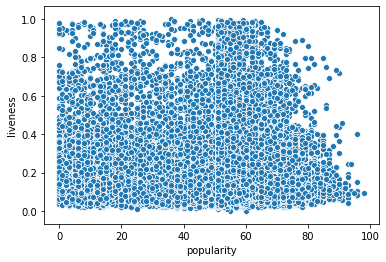

In [66]:
sns.scatterplot(x= vis_df.popularity, y=vis_df.liveness)

In [81]:


%matplotlib inline


(16.0, 0.0)

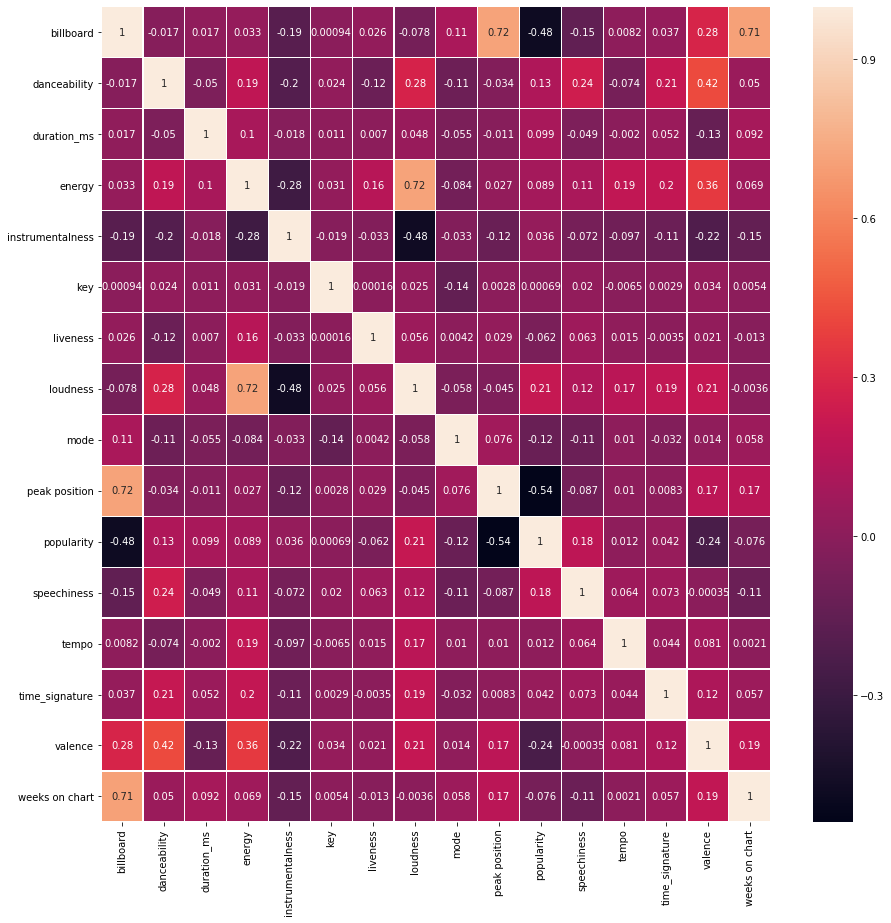

In [83]:
corrmat = vis_df.corr()
plt.figure(figsize=(15,15))
ax = sns.heatmap(corrmat, annot=True, linewidths=0.2) #notation: "annot" not "annote"
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)




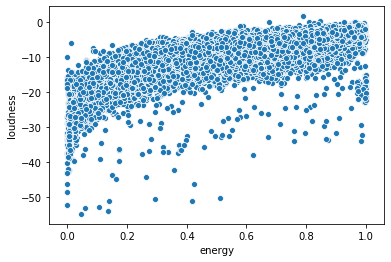

In [84]:
sns.scatterplot(vis_df.energy, vis_df.loudness)

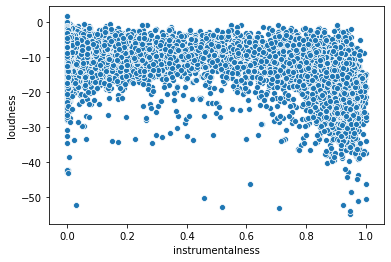

In [86]:
sns.scatterplot(vis_df.instrumentalness, vis_df.loudness)

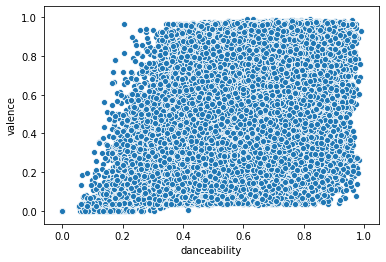

In [87]:
sns.scatterplot(vis_df.danceability, vis_df.valence)

In [88]:
vis_df.to_csv('vis_data.csv')

In [ ]:
vis_df.groupby(by='')